## The main routine that we will use works when the input is a tree (directed towards the root).

*min_cost_delegation(tree, voting_costs, delegating_costs, max_path_length):*

*   tree: List of lists representing the tree, where tree[i] contains the indices of incoming neighbors of vertex i
*   voting_costs: List where voting_costs[i] is the voting cost of vertex i
*   delegating_costs: List where delegating_costs[i] is the delegating cost of vertex i (we will mostly use the unit list hereinafter)
*   max_path_length: Maximum allowed path length from a delegating vertex to a casting voter
* it returns a tuple showing the minimum cost and the list of indices of selected voters to cast ballots.


In [15]:
import matplotlib.pyplot as plt

def min_cost_delegation(tree, voting_costs, delegating_costs, max_path_length):
    n = len(tree)  # Number of vertices

    # Find root: vertex with no outgoing edges
    is_child = [False] * n
    for i in range(n):
        for child in tree[i]:
            is_child[child] = True

    root = -1
    for i in range(n):
        if not is_child[i]:
            root = i
            break

    if root == -1:
        raise ValueError("No root found. The input is not a valid tree.")

    # Initialize DP table,dp[v][k] = (cost, selected vertices) for subtree rooted at v with max path length k
    dp = [[(float('inf'), []) for _ in range(max_path_length + 1)] for _ in range(n)]

    # bottom-up traversal
    def dfs(vertex):
        children = tree[vertex]

        # Base case: leaf node
        if not children:
            # Leaf vertex votes
            dp[vertex][0] = (voting_costs[vertex], [vertex])

            # Leaf vertex delegates (only valid if max_path_length > 0)
            for k in range(1, max_path_length + 1):
                dp[vertex][k] = (delegating_costs[vertex], [])

            return

        # Process children first
        for child in children:
            dfs(child)

        # Case 1: vertex votes
        selected_vertices = [vertex]
        total_cost = voting_costs[vertex]

        for child in children:
            # For each child, find the best option (vote or delegate with any valid path length)
            min_child_cost = float('inf')
            best_child_selected = []

            # Child votes
            child_cost, child_selected = dp[child][0]
            if child_cost < min_child_cost:
                min_child_cost = child_cost
                best_child_selected = child_selected

            # Child delegates
            for k in range(1, max_path_length + 1):
                child_cost, child_selected = dp[child][k]
                if child_cost < min_child_cost:
                    min_child_cost = child_cost
                    best_child_selected = child_selected

            total_cost += min_child_cost
            selected_vertices.extend(best_child_selected)

        dp[vertex][0] = (total_cost, selected_vertices)

        # Case 2: vertex delegates (only valid if k > 0)
        for k in range(1, max_path_length + 1):
            selected_vertices = []
            total_cost = delegating_costs[vertex]

            for child in children:
                # For each child, find the best option
                # Either child votes, or delegates with path length k-1
                min_child_cost = float('inf')
                best_child_selected = []

                # Child votes
                child_cost, child_selected = dp[child][0]
                if child_cost < min_child_cost:
                    min_child_cost = child_cost
                    best_child_selected = child_selected

                # Child delegates with path length k-1 (only if k > 1)
                if k > 1:
                    child_cost, child_selected = dp[child][k-1]
                    if child_cost < min_child_cost:
                        min_child_cost = child_cost
                        best_child_selected = child_selected

                total_cost += min_child_cost
                selected_vertices.extend(best_child_selected)

            dp[vertex][k] = (total_cost, selected_vertices)

    dfs(root)

    # Root must vote
    min_cost, selected_vertices = dp[root][0]


    # print(f"Selected vertices: {selected_vertices}")
    # all_vertices = set(range(len(tree)))
    # delegating_vertices = all_vertices - set(selected_vertices)
    # print(f"Delegating vertices: {list(delegating_vertices)}")
    # total_delegating_cost = sum(delegating_costs[v] for v in delegating_vertices)
    # print(f"Total cost breakdown: Voting = {total_voting_cost}, Delegating = {total_delegating_cost}, Total = {total_voting_cost + total_delegating_cost}")


    total_voting_cost = sum(voting_costs[v] for v in selected_vertices)
    # print(f"Total voting cost: {total_voting_cost}")


    return total_voting_cost, selected_vertices

## Some examples on the usage of our main DP routine follow

In [2]:
    """
    Simple tree example:
         0
        / \
       1   2
      / \   \
     3   4   5
    """
tree = [
        [1, 2],  # 0 has incoming edges from 1 and 2
        [3, 4],  # 1 has incoming edges from 3 and 4
        [5],     # 2 has incoming edge from 5
        [],      # 3 has no incoming edges
        [],      # 4 has no incoming edges
        []       # 5 has no incoming edges
    ]

voting_costs = [12, 6, 3, 2, 2, 12]
delegating_costs = [1, 1, 1, 1, 1, 1]
max_path_length = 1

min_cost_delegation(tree, voting_costs, delegating_costs, max_path_length)

(19, [0, 3, 4, 2])

In [3]:
    """
    Deeper tree example:
           0
          / \
         1   2
        /     \
       3       4
      / \     / \
     5   6   7   8
    """
tree = [
        [1, 2],   # 0 has incoming edges from 1 and 2
        [3],      # 1 has incoming edge from 3
        [4],      # 2 has incoming edge from 4
        [5, 6],   # 3 has incoming edges from 5 and 6
        [7, 8],   # 4 has incoming edges from 7 and 8
        [],       # 5 has no incoming edges
        [],       # 6 has no incoming edges
        [],       # 7 has no incoming edges
        []        # 8 has no incoming edges
    ]

voting_costs = [2, 6, 7, 5, 8, 2, 2, 2, 6]
delegating_costs = [1, 1, 1, 1, 1, 1, 1, 1, 1]

max_path_length = 2

min_cost_delegation(tree, voting_costs, delegating_costs, max_path_length)



(13, [0, 5, 6, 2])

In [4]:
    """
    Linear chain example:
    0 <- 1 <- 2 <- 3 <- 4 <- 5
    """
tree = [
        [1],      # 0 has incoming edge from 1
        [2],      # 1 has incoming edge from 2
        [3],      # 2 has incoming edge from 3
        [4],      # 3 has incoming edge from 4
        [5],      # 4 has incoming edge from 5
        []        # 5 has no incoming edges
    ]

voting_costs = [5, 5, 5, 10, 5, 5]
delegating_costs = [1, 1, 1, 1, 1, 1]
max_path_length = 2
min_cost_delegation(tree, voting_costs, delegating_costs, max_path_length)


(15, [0, 1, 4])

In [5]:
    """
    Star topology example:
        0
       /|\
      1 2 3
     /|   |\
    4 5   6 7
    """
tree = [
        [1, 2, 3],    # 0 has incoming edges from 1, 2, 3
        [4, 5],       # 1 has incoming edges from 4, 5
        [],           # 2 has no incoming edges
        [6, 7],       # 3 has incoming edges from 6, 7
        [],           # 4 has no incoming edges
        [],           # 5 has no incoming edges
        [],           # 6 has no incoming edges
        []            # 7 has no incoming edges
    ]

voting_costs = [10, 3, 5, 5, 2, 2, 2, 2]
delegating_costs = [1, 1, 1, 1, 1, 1, 1, 1]
max_path_length = 1

min_cost_delegation(tree, voting_costs, delegating_costs, max_path_length)

(17, [0, 1, 6, 7])

In [6]:

    """
    Unbalanced tree example:
           0
          / \
         1   2
        /     \
       3       4
      /         \
     5           6
    """
tree = [
        [1, 2],   # 0 has incoming edges from 1 and 2
        [3],      # 1 has incoming edge from 3
        [4],      # 2 has incoming edge from 4
        [5],      # 3 has incoming edge from 5
        [6],      # 4 has incoming edge from 6
        [],       # 5 has no incoming edges
        []        # 6 has no incoming edges
    ]

voting_costs = [12, 7, 7, 4, 9, 2, 2]
delegating_costs = [1, 1, 1, 1, 1, 1, 1]

max_path_length=1
min_cost_delegation(tree, voting_costs, delegating_costs, max_path_length)

(25, [0, 3, 2, 6])

### We now extend our code to handle any (connected) graph of out-deg<=1. Those are graphs with at most a cycle, so if we remove an edge (any such) we have a tree and our min_cost_delegation procedure can run. We can repeat this for every possible edge removal.

In [7]:
import networkx as nx
def adjacency_list_to_edgelist(tree):
    """Converts an adjacency list representation to an edge list."""
    edges = []
    for child, parents in enumerate(tree):
        for parent in parents:
            edges.append((parent, child))
    return edges

def is_connected_after_removal(graph, edge):
    """Checks if the graph remains connected after removing the given edge."""
    G = nx.DiGraph(graph)
    G.remove_edge(*edge)
    return nx.is_weakly_connected(G)

def get_tree_after_removal(graph, edge):
    """Returns the tree representation after removing the given edge."""
    G = nx.DiGraph(graph)
    G.remove_edge(*edge)
    tree = [[] for _ in range(len(graph))]
    for u, v in G.edges:
        tree[v].append(u)
    return tree

def min_cost_after_edge_removal(tree, voting_costs, delegating_costs, max_path_length):
    edges = adjacency_list_to_edgelist(tree)
    G = nx.DiGraph(edges)
    min_cost = float('inf')
    best_set = set()

    # If already a tree, run min_cost_delegation without removing anything
    if nx.is_tree(G):
        min_cost, best_set = min_cost_delegation(tree, voting_costs, delegating_costs, max_path_length)

    for edge in G.edges:
        # print('remove:',edge)
        if is_connected_after_removal(G, edge):
            new_tree = get_tree_after_removal(G, edge)
            cost, selected_vertices = min_cost_delegation(new_tree, voting_costs, delegating_costs, max_path_length)
            if cost < min_cost:
                min_cost = cost
                best_set = selected_vertices

    return min_cost, best_set

In [8]:
# Example usage
tree = [
    [1, 2, 10],  # 0 has incoming edges from 1 and 2, 10
    [3],      # 1 has incoming edge from 3
    [4],      # 2 has incoming edge from 4
    [5, 6],   # 3 has incoming edges from 5 and 6
    [7, 8],   # 4 has incoming edges from 7 and 8
    [], [], [], [],  # Leaves
    [0],
    [9]
]
voting_costs = [2, 2, 3, 4, 5, 6, 7, 8, 9, 2, 2]
delegating_costs = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
max_path_length = 6

min_cost, selected_vertices = min_cost_after_edge_removal(tree, voting_costs, delegating_costs, max_path_length)
print(min_cost, selected_vertices)

2 [0]


### Finally, we extend the code to be able to handle disconnected inputs. In that case, we run the previous procedure for each component separately, the returned cost is the sum of voting costs for all components.

In [9]:
def dfs(graph, node, visited, component):
    visited[node] = True
    component.append(node)
    for neighbor in graph[node]:
        if not visited[neighbor]:
            dfs(graph, neighbor, visited, component)

            
def run_for_connected_components(tree, voting_costs, delegating_costs, max_path_length):
    # Step 1: Check for connected components
    visited = [False] * len(tree)
    components = []
    final_cost = 0

    for node in range(len(tree)):
        if not visited[node]:
            component = []
            dfs(tree, node, visited, component)
            components.append(component)

    # Step 2: Run min_cost_after_edge_removal for each component
    for component in components:
        # print()

        # Step 2a: Handle components of size 1
        if len(component) == 1:
            node = component[0]
            final_cost += voting_costs[node]  # Add the cost of the single node
            selected_vertices = [node]  # The selected vertex is just the single node
            # print(f"Component size 1: selected_vertex (original ID): {node}, cost: {voting_costs[node]}")
            continue  # Skip the min_cost_after_edge_removal for this component

        # Step 2b: For components with at least 2 vertices, proceed normally
        # Create an adjacency list for the component using original node IDs
        subgraph = [[] for _ in range(len(tree))]

        # Copy the relevant edges for the current component, preserving original node IDs
        for node in component:
            for neighbor in tree[node]:
                if neighbor in component:  # Only include neighbors within the component
                    subgraph[node].append(neighbor)

        # Step 2c: Call min_cost_after_edge_removal for the subgraph
        min_cost, selected_vertices = min_cost_after_edge_removal(subgraph, voting_costs, delegating_costs, max_path_length)
        final_cost += min_cost

        # Step 2d: Map selected local component vertices to their original node IDs
        original_selected_vertices = [component[node] for node in selected_vertices]

        # Step 2e: Print the original node IDs (component nodes)
        # print(f"Component min_cost: {min_cost}, selected_vertices (original IDs): {original_selected_vertices}")

    # Step 3: Print the total cost
    # print('\nThe total voting cost to be paid is')
    return final_cost

In [10]:
graph = [
    [1],  # Component 1
    [2],  # this is a path of length 2
    [],   # Leaf in Component 1
    [4],  # Component 2; path of length 1
    [],   # Leaf in Component 2
    [6],  # Component 3; path of length 1
    []    # Leaf in Component 3
]
voting_costs = [1, 2, 3, 4, 5, 6, 7]
max_path_length = 1

run_for_connected_components(graph, voting_costs, [1]*len(graph), max_path_length)

5

In [11]:
import pandas as pd
df = pd.read_csv('data.csv')

In [12]:
def build_graph(code_q, exp_num):
    essai = df.loc[(df.CodeQuestion == code_q)&(df.ExpNum == exp_num)]

    graph = []
    for i, r in essai.iterrows():
        leaves = list(essai.loc[essai.DelID == r.ID].ID)
        graph.append(leaves)
    return graph

In [13]:
graph = build_graph('K1', 'E1')
run_for_connected_components(graph, [3]*len(graph), [1]*len(graph), 1)

33

In [26]:
grouped = df.groupby(['ExpNum', 'CodeExclu']).first().CodeQuestion
data_outcome = []
for s in range(1,6):
    print(s)
    for ind, row in grouped.reset_index()[['ExpNum', 'CodeQuestion']].iterrows():
        try:
            graph = build_graph(row.CodeQuestion, row.ExpNum)
            cost = run_for_connected_components(graph, [3]*len(graph), [1]*len(graph), s)
            data_outcome.append([row.CodeQuestion, row.ExpNum, s, cost])
        except:
            continue
df_output = pd.DataFrame(data_outcome, columns=['Question', 'ExpNum', 'Constraint', 'Cost'])

1
2
3
4
5


In [27]:
df_output['Q_Exp'] = df_output['Question'].astype(str) + ' / ' + df_output['ExpNum'].astype(str)
df_output

,Question,ExpNum,Constraint,Cost,Q_Exp
0,K1,E1,1,33,K1 / E1
1,PC1,E1,1,24,PC1 / E1
2,PE11,E1,1,15,PE11 / E1
3,SR1,E1,1,24,SR1 / E1
4,T1,E1,1,24,T1 / E1
...,...,...,...,...,...
273,T1,E8,5,39,T1 / E8
274,K1,E9,5,60,K1 / E9
275,PC1,E9,5,48,PC1 / E9
276,PE91,E9,5,36,PE91 / E9


In [29]:
df_output.groupby('Q_Exp')['Cost'].nunique() == 1

Q_Exp
K1 / E1          True
K1 / E10         True
K1 / E11         True
K1 / E12         True
K1 / E13         True
K1 / E2          True
K1 / E3          True
K1 / E4          True
K1 / E5          True
K1 / E6          True
K1 / E8          True
K1 / E9          True
KKK1 / E13       True
PC1 / E1         True
PC1 / E10        True
PC1 / E12        True
PC1 / E13        True
PC1 / E2         True
PC1 / E3         True
PC1 / E4         True
PC1 / E5         True
PC1 / E6         True
PC1 / E8         True
PC1 / E9         True
PCPC1 / E13      True
PE11 / E1        True
PE11 / E2        True
PE121 / E12      True
PE131 / E13      True
PE31 / E4        True
PE31 / E5        True
PE61 / E6        True
PE81 / E8        True
PE91 / E10       True
PE91 / E11      False
PE91 / E9        True
PPE131 / E13     True
S1 / E11         True
SR1 / E1         True
SR1 / E2         True
SR1 / E4         True
SR1 / E5         True
SR1 / E6         True
T1 / E1          True
T1 / E10         True
T1 /

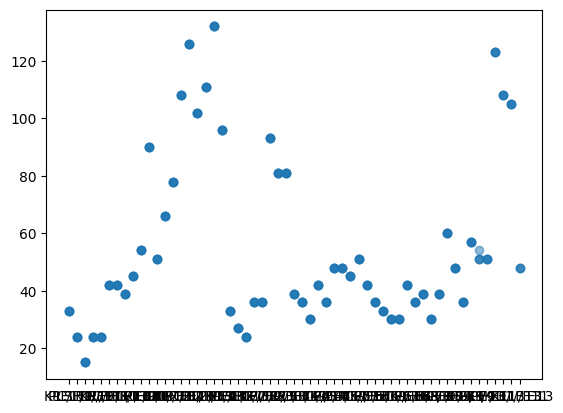

In [21]:
plt.scatter(df_output.Q_Exp, df_output.Cost, alpha = 0.5)

In [22]:
data_outcome = []
for s in [1]:
    print(s)
    for ind, row in grouped.reset_index()[['ExpNum', 'CodeQuestion']].iterrows():
        try:
            graph = build_graph(row.CodeQuestion, row.ExpNum)
            cost = run_for_connected_components(graph, [3]*len(graph), [1]*len(graph), s)
            data_outcome.append([row.CodeQuestion, row.ExpNum, s, cost])
        except:
            continue
df_output = pd.DataFrame(data_outcome, columns=['Question', 'ExpNum', 'Constraint', 'Cost'])

1


In [23]:
max_weight = df.groupby(by=['ExpNum', 'CodeExclu']).Weight.max().reset_index()
max_weight['CodeExclu'] = max_weight['CodeExclu'].astype(str) + '1'
max_weight = max_weight.rename(columns={'CodeExclu': 'Question'})

summary = df_output.groupby(by=['ExpNum', 'Question']).Cost.agg(['mean', 'std']).reset_index()
df_merged = pd.merge(summary, max_weight, on=['ExpNum', 'Question'], how='left') 

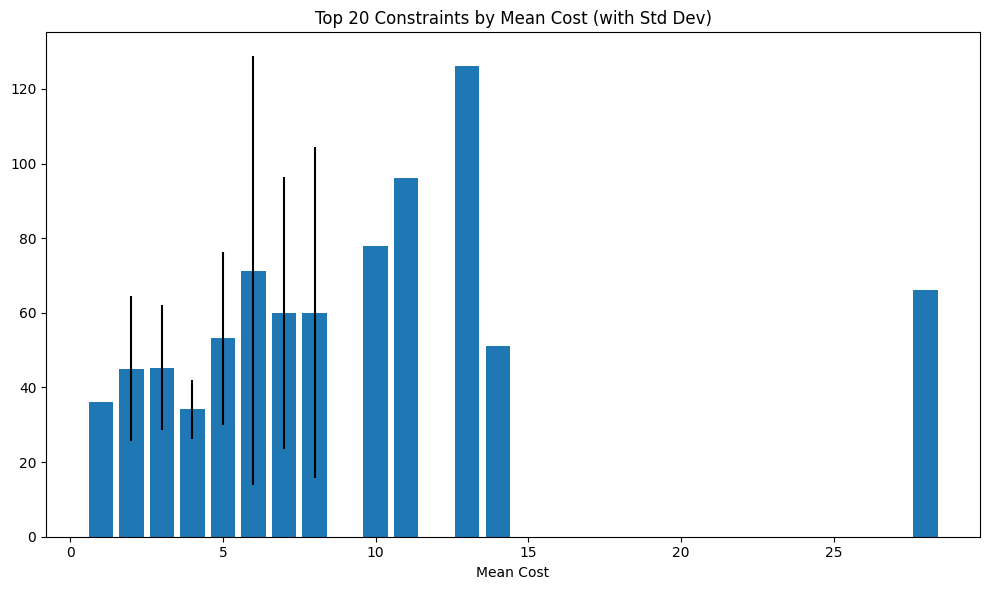

In [24]:
top = df_merged.groupby('Weight')['mean'].agg(['mean', 'std']).reset_index()


plt.figure(figsize=(10, 6))
plt.bar(top['Weight'], top['mean'], yerr=top['std'])
plt.xlabel('Mean Cost')
plt.title('Mean Cost as a Function of Max Weight')
# plt.gca().invert_yaxis()  # Highest on top
plt.tight_layout()
plt.show()